# Nuages de mots

## Imports et stopwords

In [52]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /home/pav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "Brux", "écrire",
       "ecrire","écr", "ecr", "vente"
       ,"Bruxelles", "Brux","BRUXELLES", "bruxelles"
       "vend", "Belgique", "prix", "rue", "maison", "Maison"
       , "bon", "Tél", "tél", "très", "vend"
       "tél", "ans"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [54]:
# Choisir une année
year = 1969

In [55]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['KB_JB838_1969-04-02_01-00021.txt',
 'KB_JB838_1969-08-10_01-00017.txt',
 'KB_JB838_1969-01-11_01-00010.txt',
 'KB_JB838_1969-10-15_01-00019.txt',
 'KB_JB838_1969-06-19_01-00007.txt',
 'KB_JB838_1969-10-17_01-00020.txt',
 'KB_JB838_1969-03-02_01-00018.txt',
 'KB_JB838_1969-04-13_01-00035.txt',
 'KB_JB838_1969-04-01_01-00018.txt',
 'KB_JB838_1969-10-19_01-00011.txt',
 'KB_JB838_1969-04-10_01-00009.txt',
 'KB_JB838_1969-11-06_01-00013.txt',
 'KB_JB838_1969-02-27_01-00032.txt',
 'KB_JB838_1969-04-13_01-00023.txt',
 'KB_JB838_1969-09-11_01-00010.txt',
 'KB_JB838_1969-09-05_01-00024.txt',
 'KB_JB838_1969-09-11_01-00027.txt',
 'KB_JB838_1969-06-26_01-00012.txt',
 'KB_JB838_1969-08-21_01-00014.txt',
 'KB_JB838_1969-11-04_01-00019.txt',
 'KB_JB838_1969-09-26_01-00010.txt',
 'KB_JB838_1969-08-09_01-00016.txt',
 'KB_JB838_1969-06-17_01-00015.txt',
 'KB_JB838_1969-04-09_01-00026.txt',
 'KB_JB838_1969-05-29_01-00013.txt',
 'KB_JB838_1969-05-17_01-00029.txt',
 'KB_JB838_1969-05-31_01-00020.txt',
 

In [56]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [57]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [58]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

'4 tîîtt : MERCREDI 2 AVRIL 1969 LE SOIR » 21 INTERNATIONAL COMPANY - BRUSSELS 15 has vacàncy for TW0 MALE EMPLOYEES for its commercial services. aged 20 to 35. — Perfect command of ENGLISH and fluency'

In [59]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [60]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

"4 tîîtt : MERCREDI 2 AVRIL 1969 LE SOIR » 21 INTERNATIONAL COMPANY - BRUSSELS 15 has vacàncy for TW0 MALE EMPLOYEES for its commercial services. aged 20 to 35. — Perfect command of ENGLISH and fluency in FRENCH essential; caii 71.01.90 ext. 31 for first contact. 167433 H » *4 ♦♦ ♦♦ 44 44 tt ♦♦ îî *♦ ♦♦ 44 44 4* ' 44 44 44 44 44 44 S.A. ISBECQUE TODD 25-27/ bld. Emile Bockstael, Bruxelles 2 engage , DACTYLOS expérimentées bilingues ayant si possible bonnes notions d'anglais. Semaine de 5 jours. O"

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [61]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [62]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1969_clean.txt!'

In [63]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'TÎÎTT MERCREDI AVRIL SOIR INTERNATIONAL COMPANY BRUSSELS HAS VACÀNCY FOR MALE EMPLOYEES FOR ITS COMMERCIAL SERVICES AGED PERFECT COMMAND ENGLISH AND FLUENCY FRENCH ESSENTIAL CAII EXT FOR FIRST CONTACT ISBECQUE TODD BLD EMILE BOCKSTAEL BRUXELLES ENGAGE DACTYLOS EXPÉRIMENTÉES BILINGUES POSSIBLE BONNES NOTIONS ANGLAIS SEMAINE JOURS OFFRE MANUSCRITE RÉFÉRENCES PRÉTENTIONS COMINIERE RECHERCHE BUREAU ÉTUDEE INGENIEUR TECHNICIEN ELECTRO MECANICIEN EXPÉRIMENTÉ CONNAISSANCES CONSTRUCTIONS CIVILES CURRICU'

## Nuage de mots

### Afficher les termes les plus fréquents


In [64]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('BRUXELLES', 1395), ('APP', 914), ('BRUX', 677), ('GAR', 582), ('HEURES', 486), ('PRÉS', 466), ('CUIS', 465), ('DEMANDE', 413), ('PART', 399), ('SOIR', 395)]


### Créer, stocker et afficher le nuage de mots

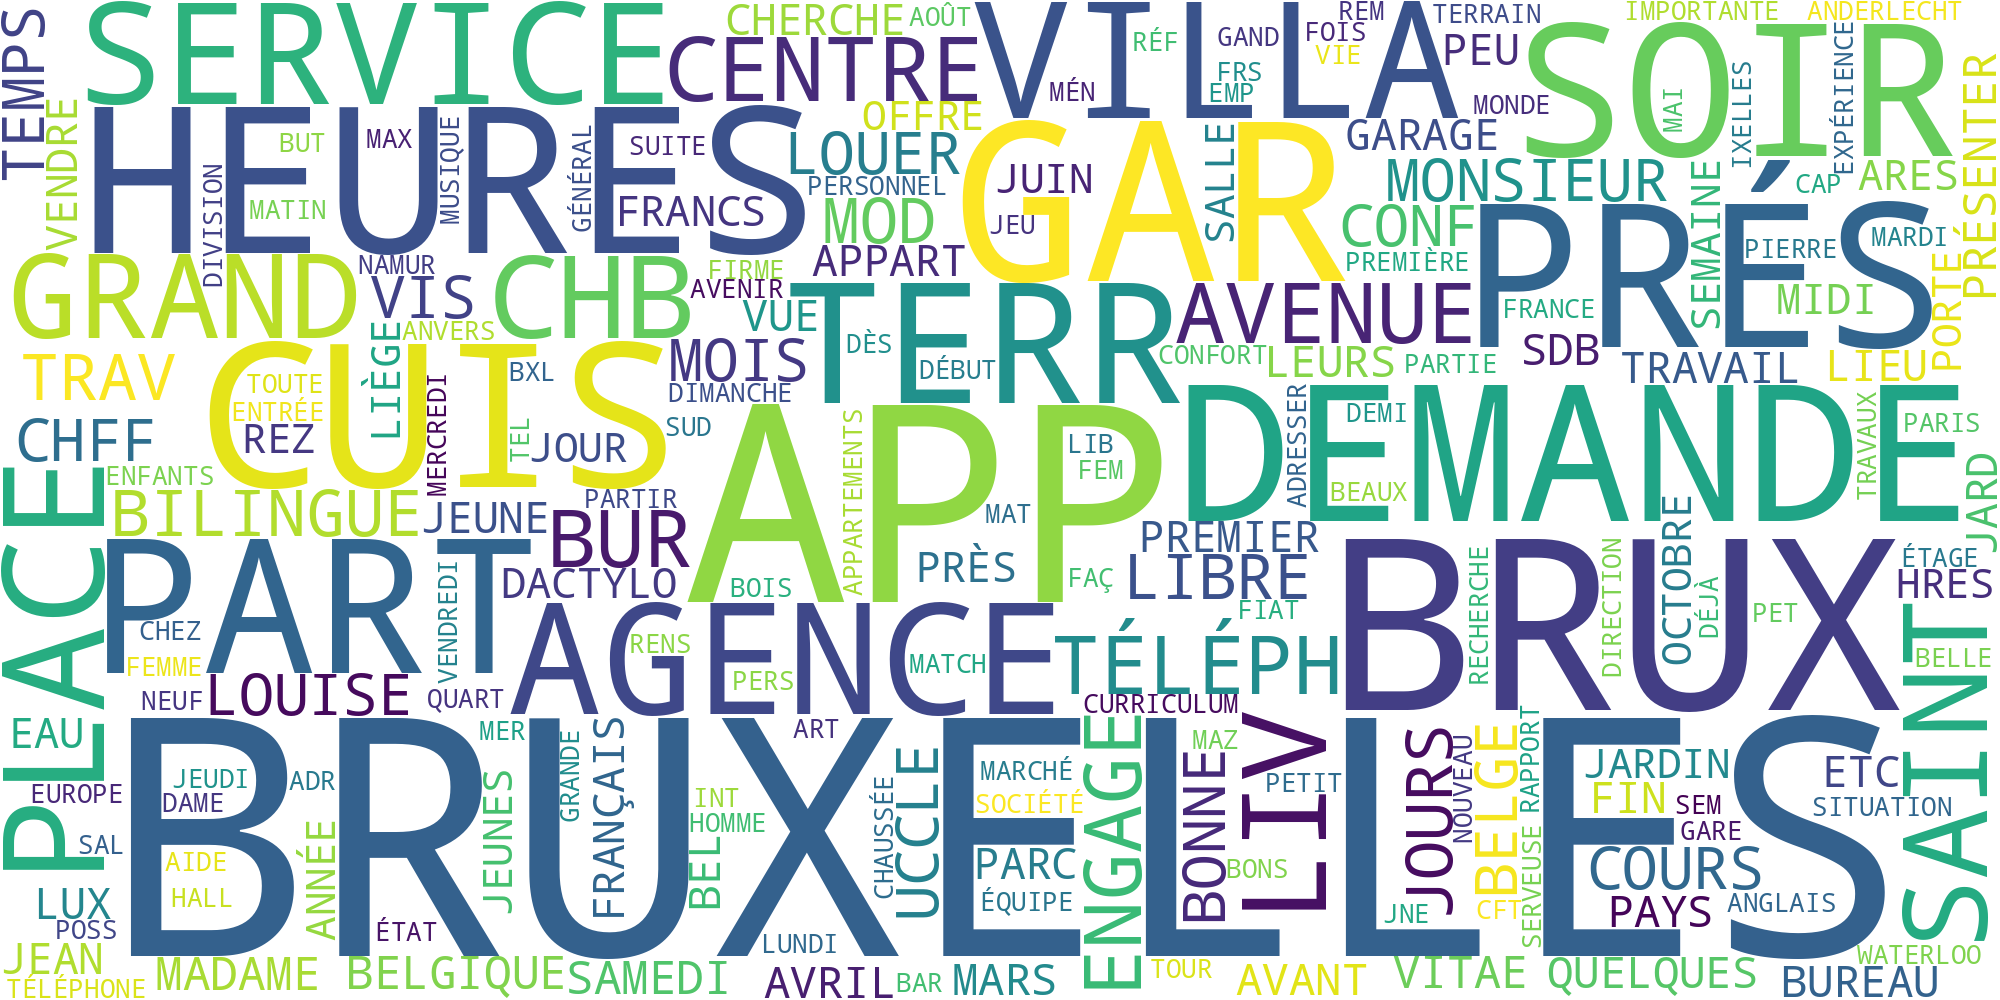

In [65]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))